# IIC-3641 GML UC


## Actividad en clase

Vamos a medir la función de crecimiento de hubs usando el modelo Barabási-Albert. Para eso haga lo siguiente:

- Defina una función que retorna el grado máximo de una red.
- Cree varias redes usando el modelo Barabási-Albert de manera que N se mueva en intervalos de decenas desde 10 hasta 10000. Use m=3.
- Calcule el $k_{max}$ de cada red.
- Plotee la curva $k_{max}$ versus N en ejes log-log.
- Ajuste una regresión lineal a la curva y calcule la pendiente. 
- Vea la lámina 15. Según sus resultados ¿Se observa la propiedad scale-free? ¿Cuál sería el valor de α? ¿Cuál sería el valor de γ? 
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que las L otorgan un bono en la nota final de la asignatura.

***Tiene hasta el final de la clase.***

## Defino una función que encuentra el grado máximo de la red

In [1]:
def max_degree(G):
    node_degrees = dict(G.degree())
    degrees = np.array(list(node_degrees.values()))
    max_degree = degrees.max()
    return max_degree

In [2]:
import numpy as np

seeds = np.arange(10,10000,10)

## Calculo las redes usando el modelo

In [3]:
import networkx as nx

y = []

for N in seeds:
    G = nx.barabasi_albert_graph(N, m = 3, seed=None, initial_graph=None)
    y_val = max_degree(G)
    y.append(y_val)

In [4]:
y_ = np.array(y)

## Dibujo la curva kmax versus N en eje log-log

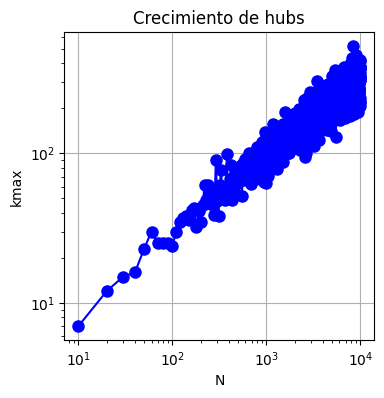

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.plot(seeds, y_, 'bo-', markersize=8)
plt.xscale('log')
plt.yscale('log')
plt.title('Crecimiento de hubs')
plt.xlabel('N')
plt.ylabel('kmax')


plt.grid(True)
plt.show()

## Ajusto la regresión lineal

In [6]:
from scipy import stats

log_N = np.log(seeds)
log_kmax = np.log(y_)

slope, intercept, r_value, p_value, std_err = stats.linregress(log_N, log_kmax)

In [7]:
slope

0.5005179498220296

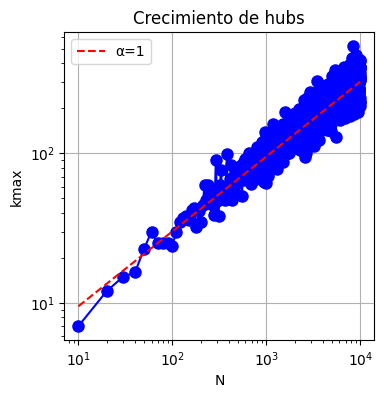

In [10]:
plt.figure(figsize=(4, 4))
plt.plot(seeds, y_, 'bo-', markersize=8)
plt.xscale('log')
plt.yscale('log')
plt.title('Crecimiento de hubs')
plt.xlabel('N')
plt.ylabel('kmax')


plt.grid(True)

plt.plot(np.exp(log_N), np.exp(intercept + slope * log_N), color='red', linestyle='--', label='α=1')
plt.legend()
plt.show()


### Scale-free con crecimiento de hub a exponente 1/2. Nos da un γ = 3.